<a href="https://colab.research.google.com/github/fkivuti/Ensemble-Project/blob/main/Copy_of_AfterWork_Data_Science_Dojo_Ensemble_Learning_with_Python_Guiding_Notebook_(Latest)_ipynb_week6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a sports Data Scientist working for an NBA team, you have been tasked to create a
solution that helps predicts whether the career length of a new rookie in the team NBA
will be =>5 or < 5.
Upon your implementation, you should outline the potential benefits of your solution to
the NBA management team while considering to renew player contracts.

### b) Defining the Metric for Success

Our model will be a success when it can make predictions with at least 80% accuracy.

### c) Understanding the Context 

The National Basketball Association (NBA) is an American men's professional basketball
league. It is composed of 30 teams (29 in the United States and 1 in Canada) and is one
of the four major professional sports leagues in the United States and Canada.
The NBA widely considered to be the premier men's professional basketball league in
the world.

Dataset Glossary
* name - description
* gp - games played
* min - minutes played
* pts - points per game
* fgm - field goals made
* fga - field goals attempts
* fg - field goal percent
* 3p_made - 3 point made
* 3pa - 3 point attemps
* 3p - 3 point percent
* ftm - free throw made
* fta - free throw attemps
* ft - free throw percent
* oreb - offensive rebounds
* dreb - defensive rebounds
* reb - rebounds
* ast - assists
* stl - steals
* blk - blocks
* tov - turnovers
* target_5yrs - outcome: 1 if career length > 5, 0 if < 5

### d) Recording the Experimental Design

- Load libraries and dataset
- Find and deal with duplicates and missing values
- Find and deal with outliers
- Find and deal with other data anomalies
- Perform univariate and bivariate analysis
- Carry out modeling
- Summarize findings and make recommendations
- Challenge the solution

### e) Data Relevance

The provided dataset is appropriate for answering the research quesiton.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/NBARookiesDs')
df.sample(5)

Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  \
1093       Jamie Feick  28  30.4   6.3  2.4   4.8  50.0      0.0  0.0   0.0   
1094       Jamie Feick  41  15.2   3.7  1.4   3.8  35.7      0.1  0.3  35.7   
314      Patrick Ewing  50  35.4  20.0  7.7  16.3  47.4      0.0  0.1   0.0   
1126  Cedric Henderson  82  30.8  10.1  4.2   8.8  48.0      0.0  0.0   0.0   
1301     Chris Whitney  40   8.5   1.8  0.6   2.1  30.5      0.3  0.8  33.3   

      FTM  FTA   FT%  OREB  DREB   REB  AST  STL  BLK  TOV  TARGET_5Yrs  
1093  1.5  2.1  71.7   4.0   6.3  10.3  0.9  0.9  0.6  1.2          1.0  
1094  0.8  1.6  50.7   2.0   3.2   5.2  0.6  0.4  0.3  0.8          1.0  
314   4.5  6.1  73.9   2.5   6.5   9.0  2.0  1.1  2.1  3.4          0.0  
1126  1.7  2.3  71.6   0.9   3.1   4.0  2.0  1.2  0.6  2.0          1.0  
1301  0.3  0.4  80.0   0.1   0.6   0.7  1.3  0.3  0.0  0.9          1.0

In [3]:
# checking dataset shape
df.shape

(1340, 21)

Our dataset has 1, 340 records and 21 variables.

In [4]:
# checking data types
df.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object

We will drop the 'Name' variable because it is not necessary.

In [5]:
df = df.drop(columns = ['Name'])

In [6]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(1328, 20)

Some duplicated values have been dropped, but it is not a significant loss.

In [7]:
# checking for missing data
df.isna().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            10
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

The 3-point percent variable ('3P%') has 10 missing values. We will impute these missing values with the mean of the column.

In [8]:
df['3P%'] = df['3P%'].fillna(df['3P%'].mean())

# confirming our dataset does not have any missing values
df.isna().sum()

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [9]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: GP
Number of unique variables: 70
[36 35 74 58 48 75 62 65 42 40 27 45 44 49 41 82 80 76 61 32 52 78 51 64
 55 34 77 72 69 54 24 50 56 67 38 37 46 19 79 81 70 33 73 47 63 15 68 39
 31 25 43 59 66 60 71 57 21 53 29 23 28 12 11 30 22 26 18 20 14 16]

Variable: MIN
Number of unique variables: 325
[27.4 26.9 15.3 11.6 11.5 11.4 10.9 10.3  9.9  8.5  6.9  6.7  6.6  6.4
  6.1  5.3  4.2 37.2 31.4 30.5 30.3 29.6 15.2 29.3 24.6 22.5 22.  20.7
 20.3 19.6 18.9 13.4 18.6 18.4 17.  16.9 15.1 14.9 14.8 14.5 13.2 12.4
 11.8 11.3 10.6  9.6  9.   8.7  8.2  7.3  4.8  4.3 37.7 13.1 35.2 33.5
 28.5 25.9 25.4 23.7  9.2 22.6 20.6 20.5 19.5 19.3 16.5 16.2 16.1 15.4
 14.3 13.6 13.3 12.5 11.9 10.8 11.2 11.  10.1 10.   9.8  9.5  9.3  7.
  6.8  6.2  5.8 36.6 10.7 33.7 33.6 31.5 30.2 30.  25.3 25.1 23.  21.7
 20.1 19.1 18.  17.9 16.8 10.4 15.9 14.  13.8 13.  12.9 34.5 21.2  9.4
  8.8 30.4  8.6  8.3 32.3  7.7  6.5  5.7  4.9  4.1 34.4 33.8 31.1 32.6
 29.7 28.1 27.6 27.1 26.1 26.7 22.2 21.1 18.5 19.  18.2 1

Because we will be carrying out classification, we need out target variable to be a categorical variable and not a numerical variable.

In [10]:
df['TARGET_5Yrs'] = df['TARGET_5Yrs'].replace({0. : '0', 1. : '1'}).astype('object')
df['TARGET_5Yrs'].dtype

dtype('O')

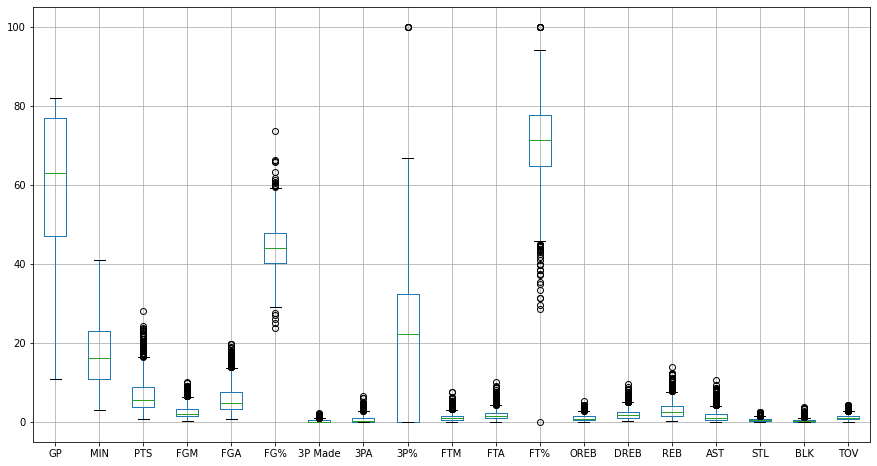

In [11]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.show()

The only variables without outliers are GP (games played) and MIN (minutes played).

In [12]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(349, 20)


GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
1270  76  32.1  17.5  7.5  13.6  55.2      0.0  0.2   0.0  2.5  4.7  53.2   
668   82  31.0   9.7  3.6   7.3  49.7      1.0  2.7  39.3  1.4  1.8  76.9   
1241  66  22.6   6.8  2.9   5.9  48.5      0.0  0.1  28.6  1.0  2.3  44.7   

      OREB  DREB  REB  AST  STL  BLK  TOV TARGET_5Yrs  
1270   4.0   5.1  9.1  3.6  1.2  2.2  2.7           1  
668    1.3   5.1  6.4  1.9  1.0  0.2  1.3           1  
1241   3.0   4.3  7.4  0.7  0.5  0.6  1.4           0

In [13]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

26.28

26% is a fairly large number of records to drop, so we will not drop our outliers.

# <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

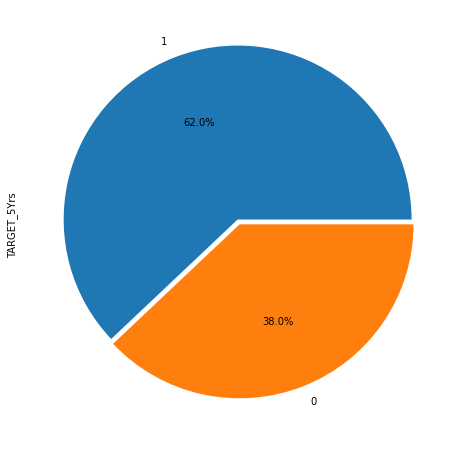

In [14]:
# pie chart showing the distribution of our target variable
plt.figure(figsize = (8, 8))
df.TARGET_5Yrs.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', explode = (0.03, 0))
plt.show()

Our target variable is not well balanced. 62% of the players have had a career length of over 5 years while the remaining 38% have not.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

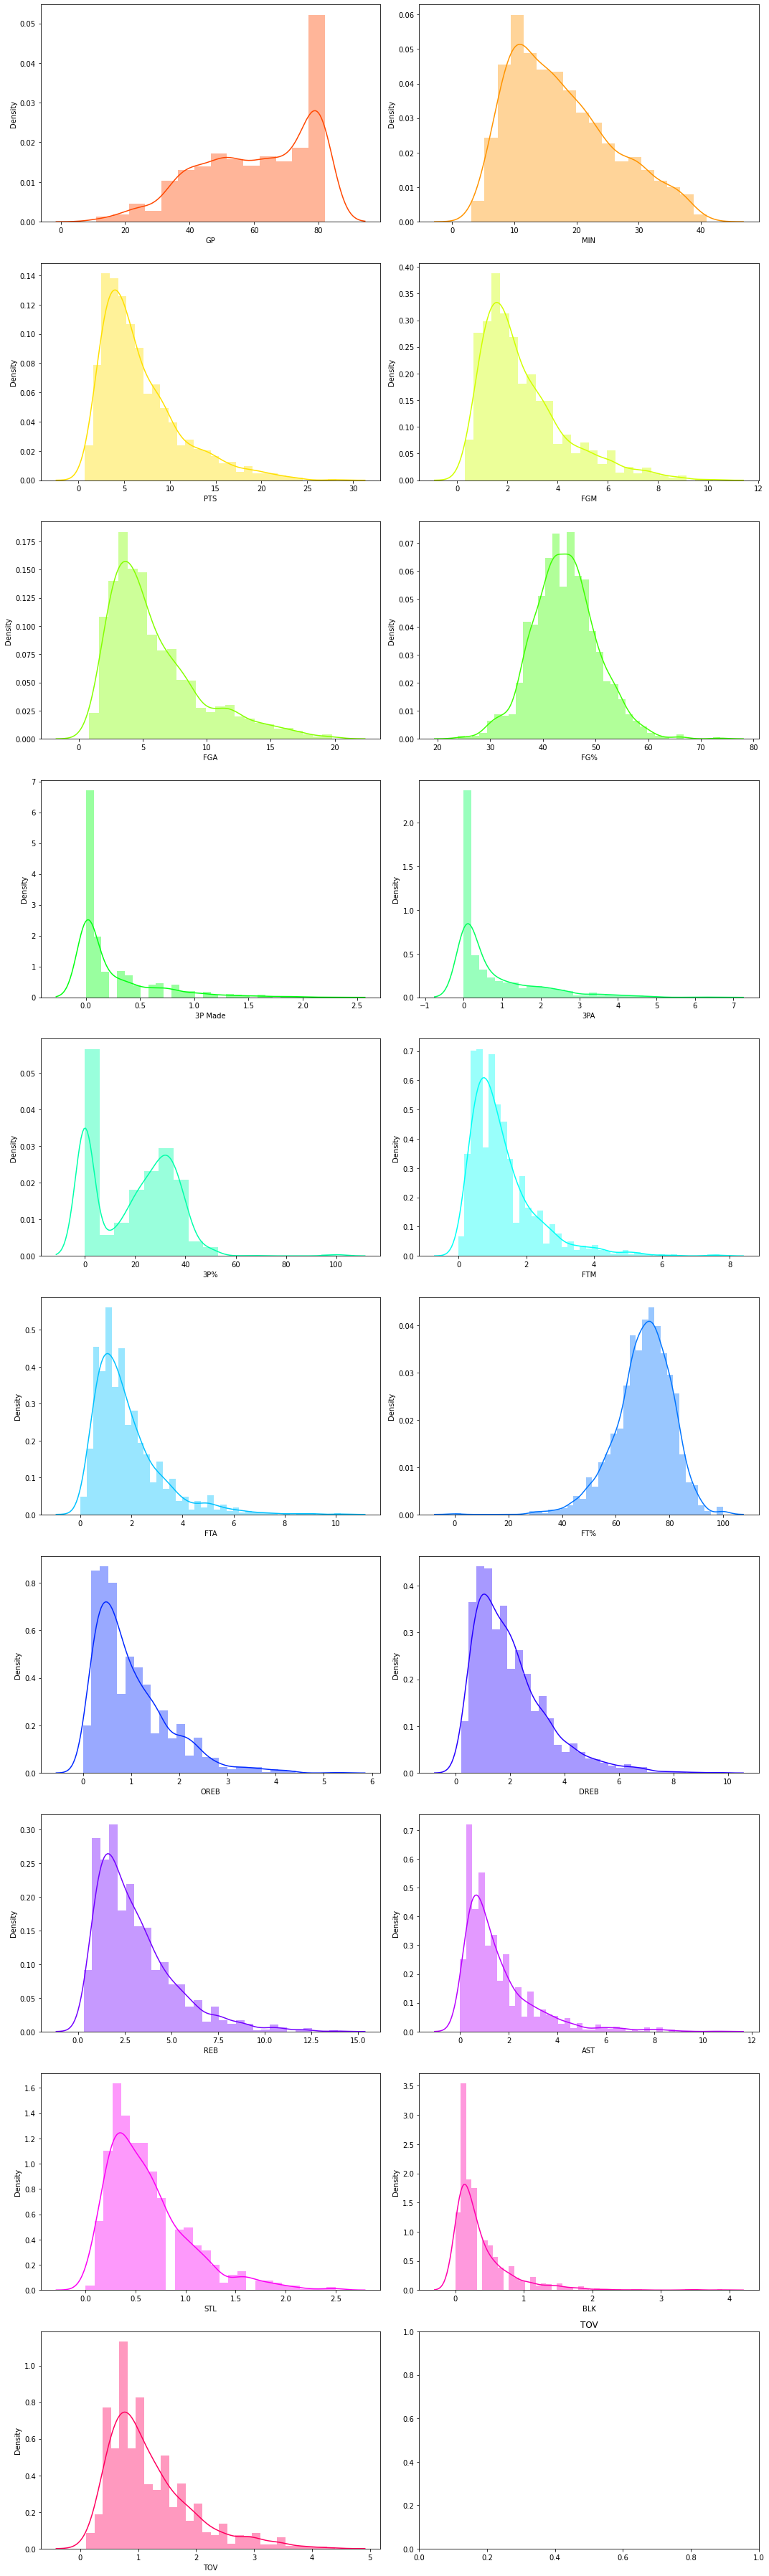

In [16]:
# histogram showing the distribution of the variables
num_cols = df.columns.to_list()
num_cols.remove('TARGET_5Yrs')
num_cols

colors = sns.color_palette("hsv", len(num_cols))
number_rows = round(len(num_cols) / 2)

fig, axes = plt.subplots(nrows = number_rows, ncols = 2, figsize = (15, 50))

for col, color, ax in zip(num_cols, colors, axes.flatten()):
    sns.distplot(df[col], color = color, ax = ax)
    plt.title(col)
    
plt.tight_layout();

We can conclude that our variables do not have normality as they are skewed either to the left or the right.

### 3.2 Bivariate Analysis

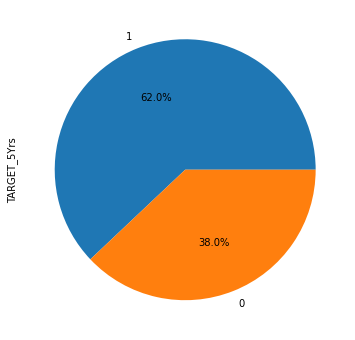

In [17]:
plt.figure(figsize = (6, 6))
df['TARGET_5Yrs'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Our target variable's values are disproportionate, with value 1 exceeding value 0 by 24%.

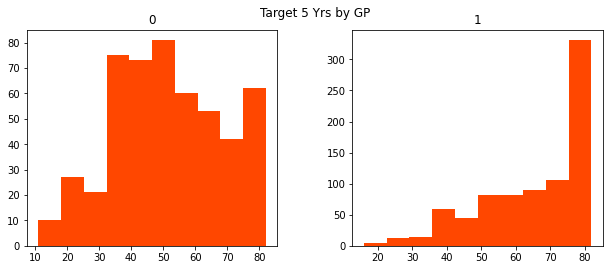

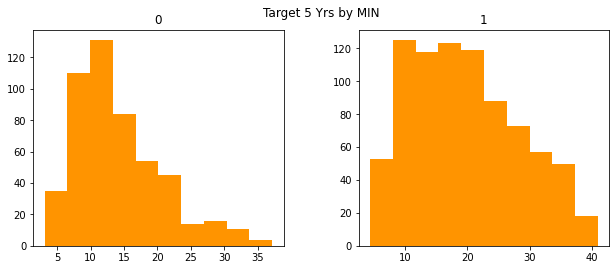

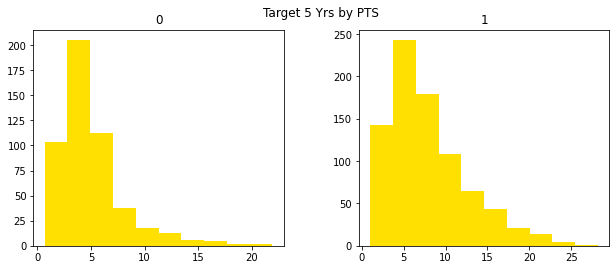

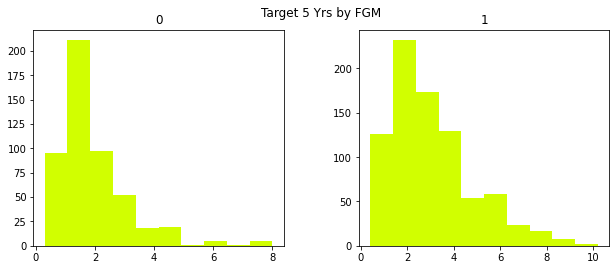

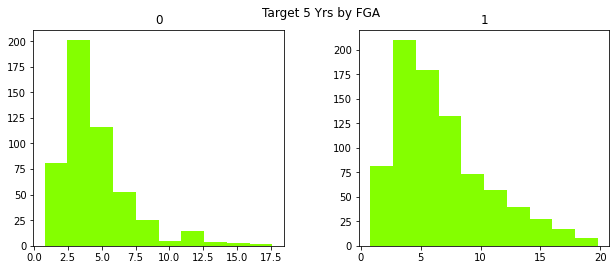

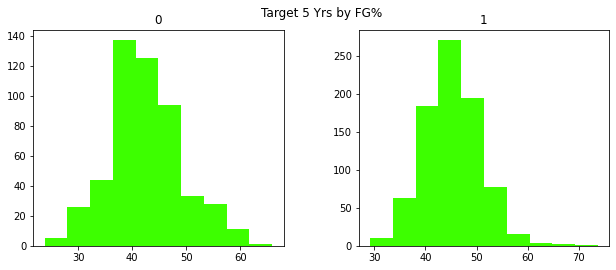

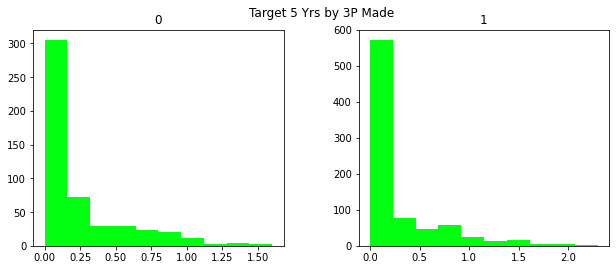

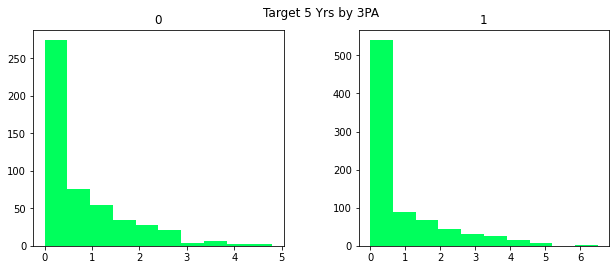

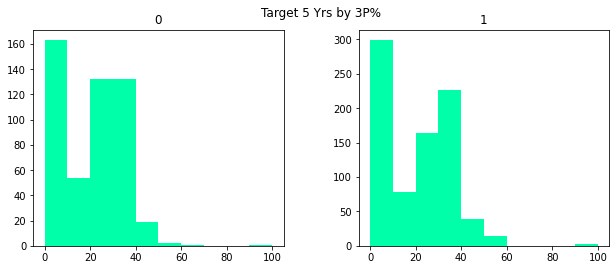

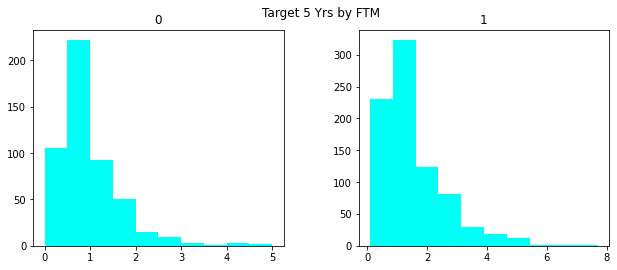

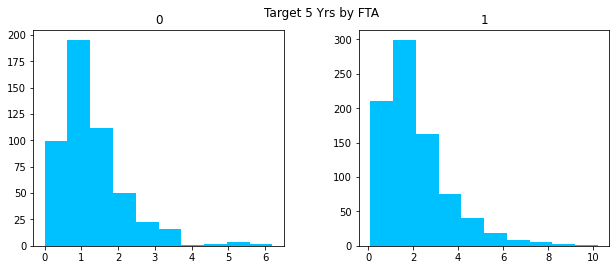

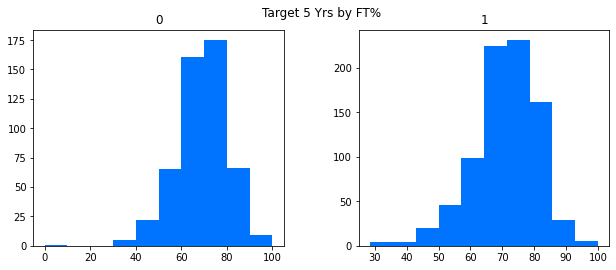

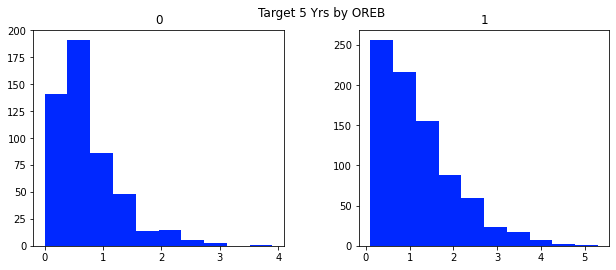

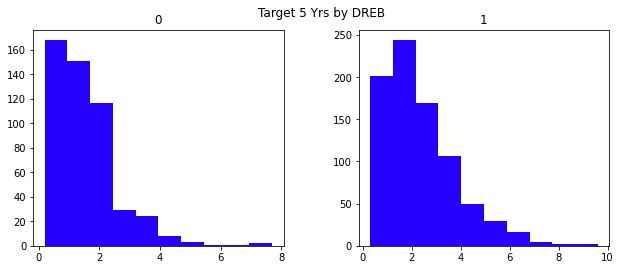

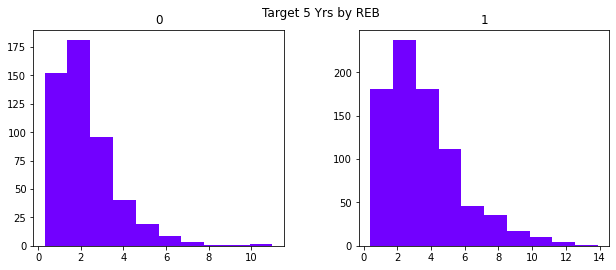

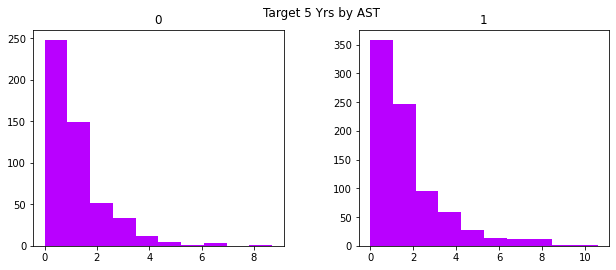

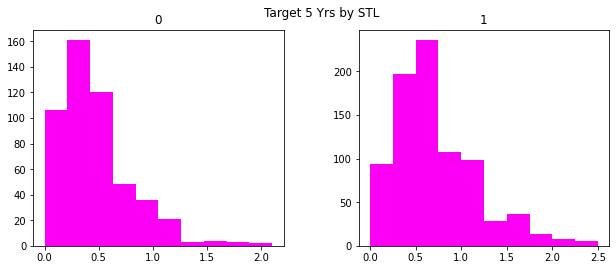

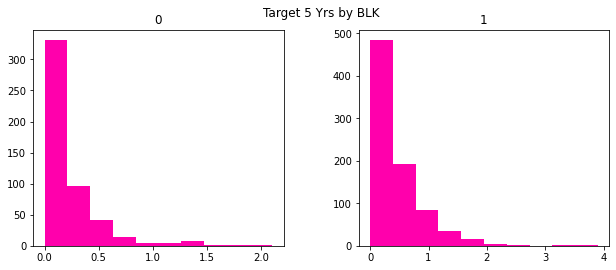

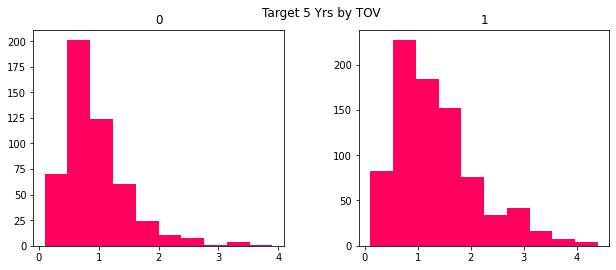

In [18]:
# getting the distribution of the other variable per the target variables
colors = sns.color_palette('hsv', len(num_cols))

for col, color in zip(num_cols, colors):
    df.hist(col, by = 'TARGET_5Yrs', color = color, rot = 0, figsize = (10, 4))
    plt.suptitle("Target 5 Yrs by {}".format(col))
    plt.show()

To summarize the above distributions:
* those whose career lengths are less than 5 have a wider spread of games played, compared to those whose career lengths exceeded 5 where the most frequent number of games is over 75
* those whose career lengths are less than 5 ,on average, played fewer minutes than those whose career lengths exceeded 5
* those whose career lengths are less than 5 scored fewer points per game than those whose career lengths exceeded 5 
* those whose career lengths are less than 5 made and attempted fewer field goals than those whose career lengths exceeded 5 
* those whose career lengths are less than 5 made and attempted more 3-points than those whose career lengths exceeded 5 
* those whose career lengths are less than 5 made and attempted fewer free throws than those whose career lengths exceeded 5 
* those whose career lengths are less than 5 made fewer offensive rebounds, defensive rebounds, and rebounds than those whose career lengths exceeded 5 
* in terms of assists, steals, and blocks, there doesn't appear to be much significant difference between those whose career lengths are less than 5 and those whose career lengths exceeded 5
* those whose career lengths are less than 5 made fewer turnovers than those whose career lengths exceeded 5 

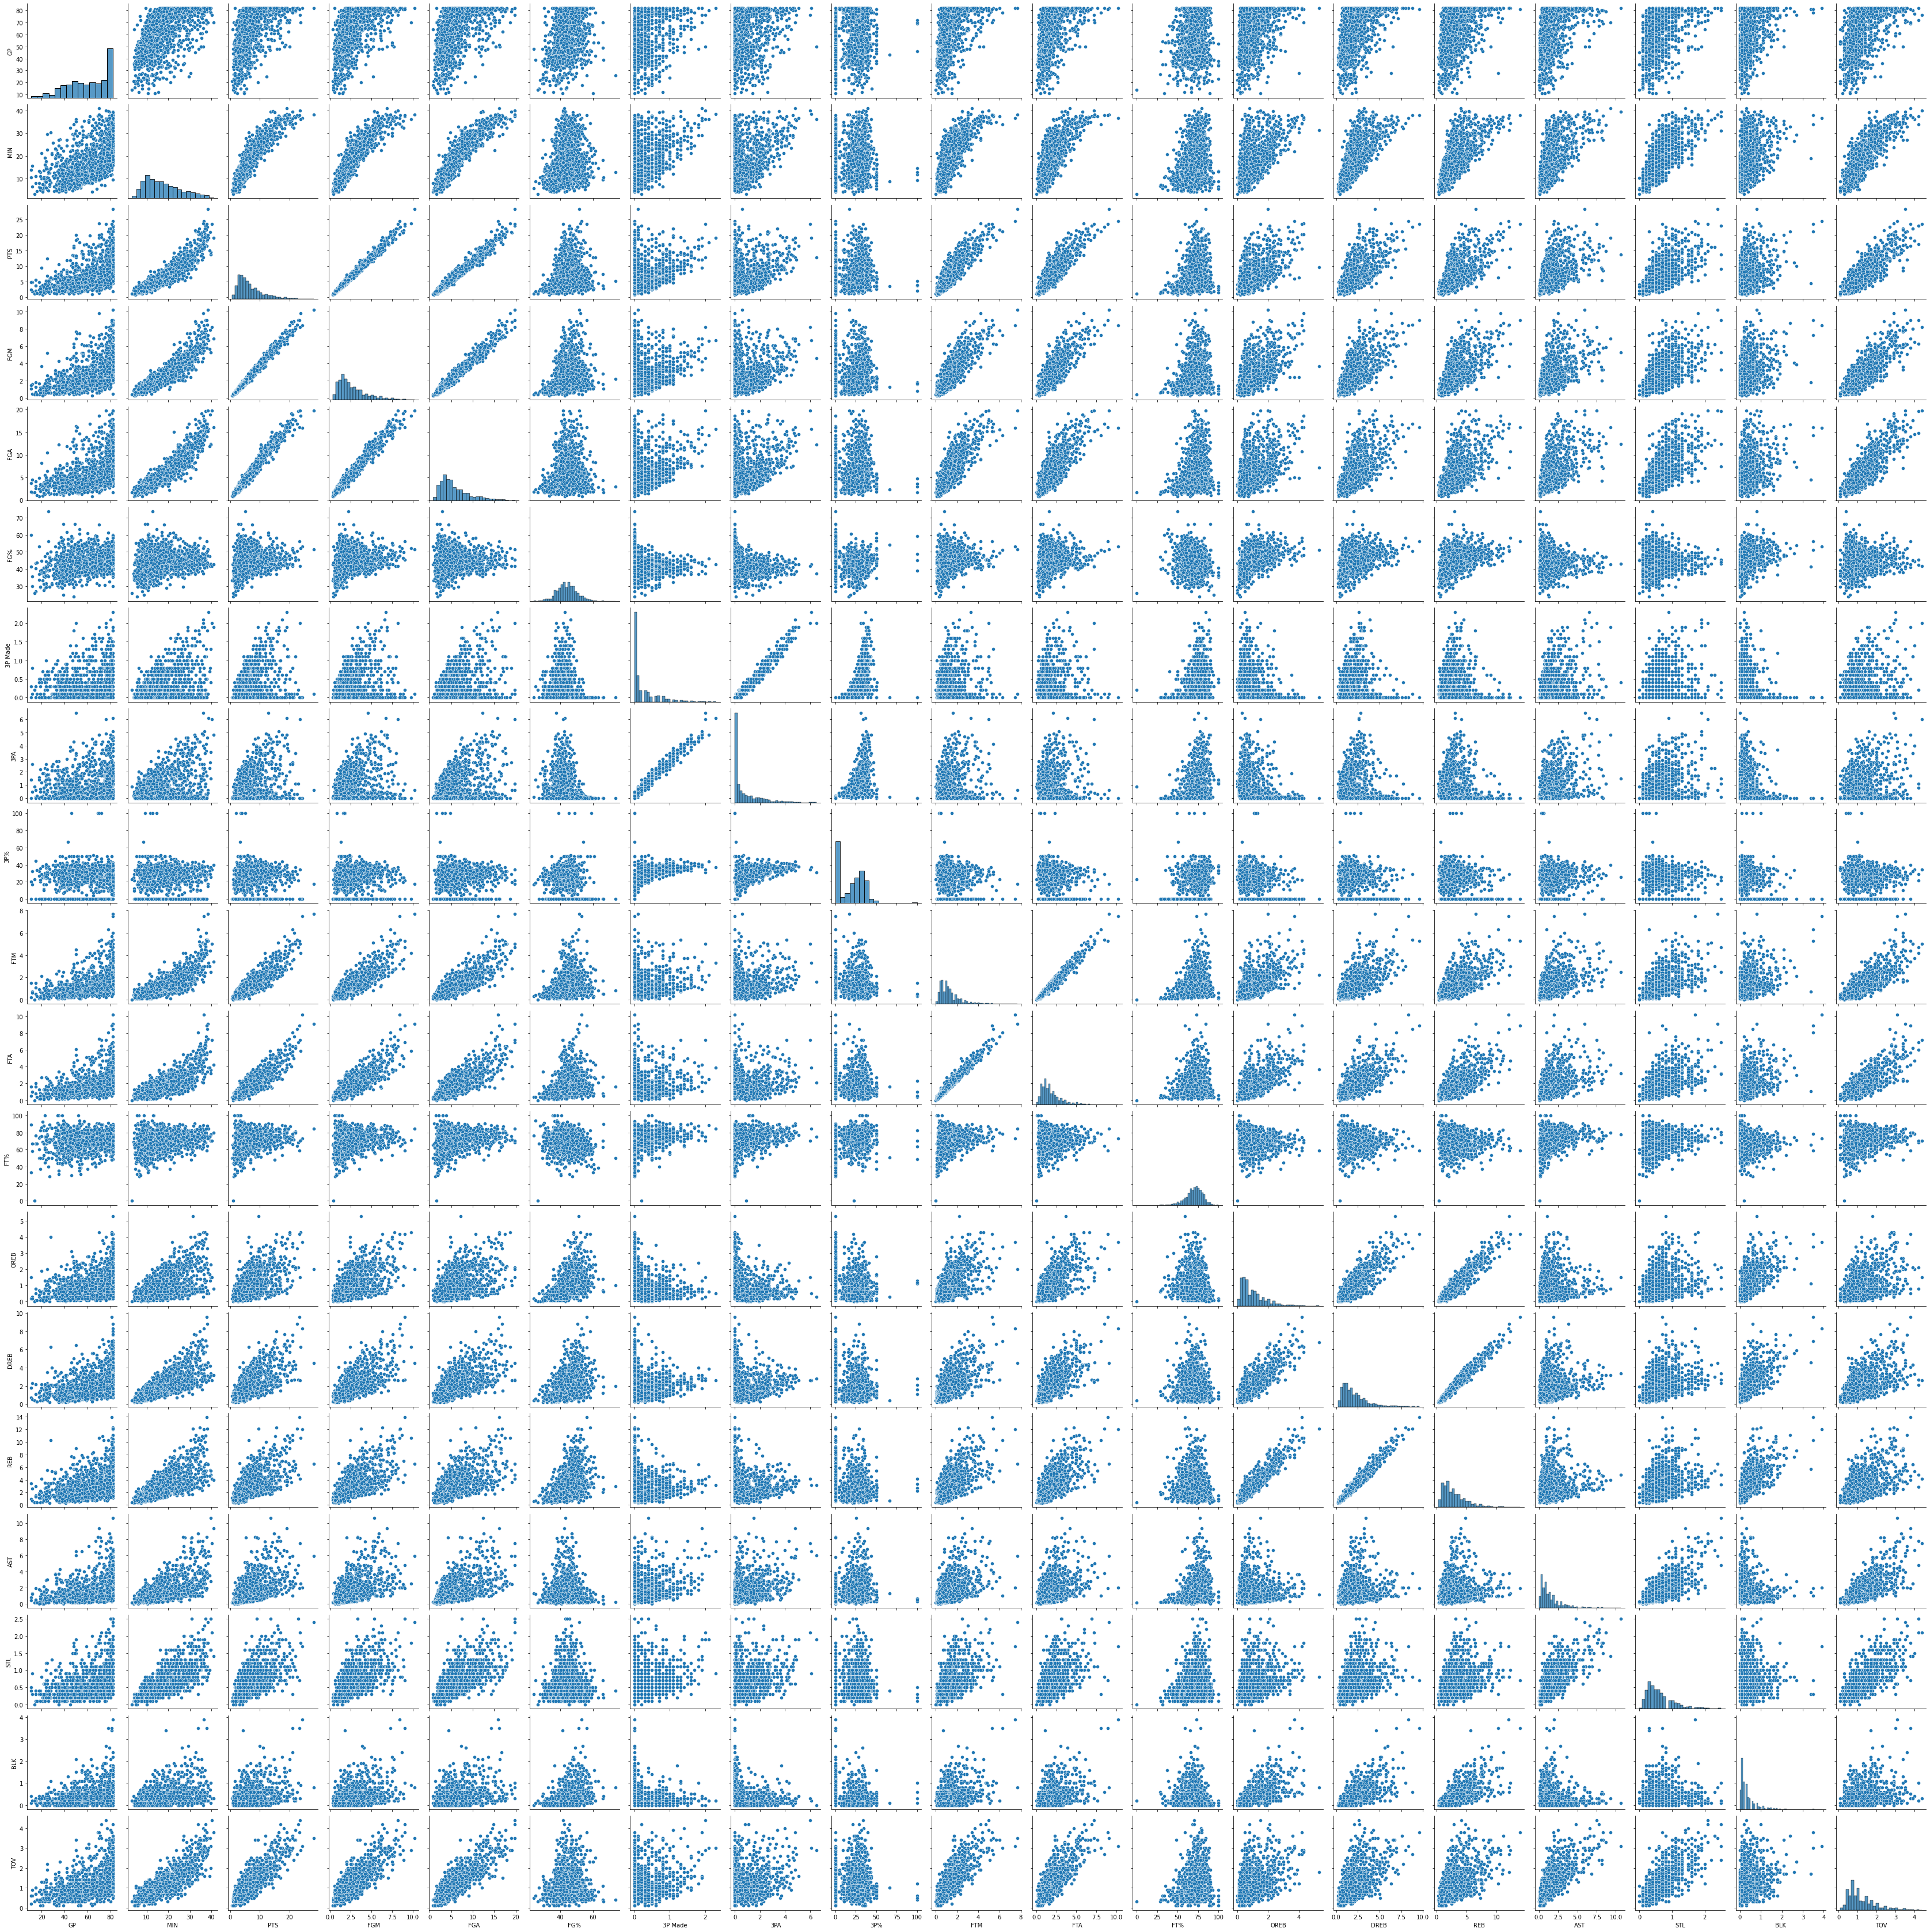

In [19]:
# generate a pairplot so we can see how the numerical variables relate to one another
sns.pairplot(df)

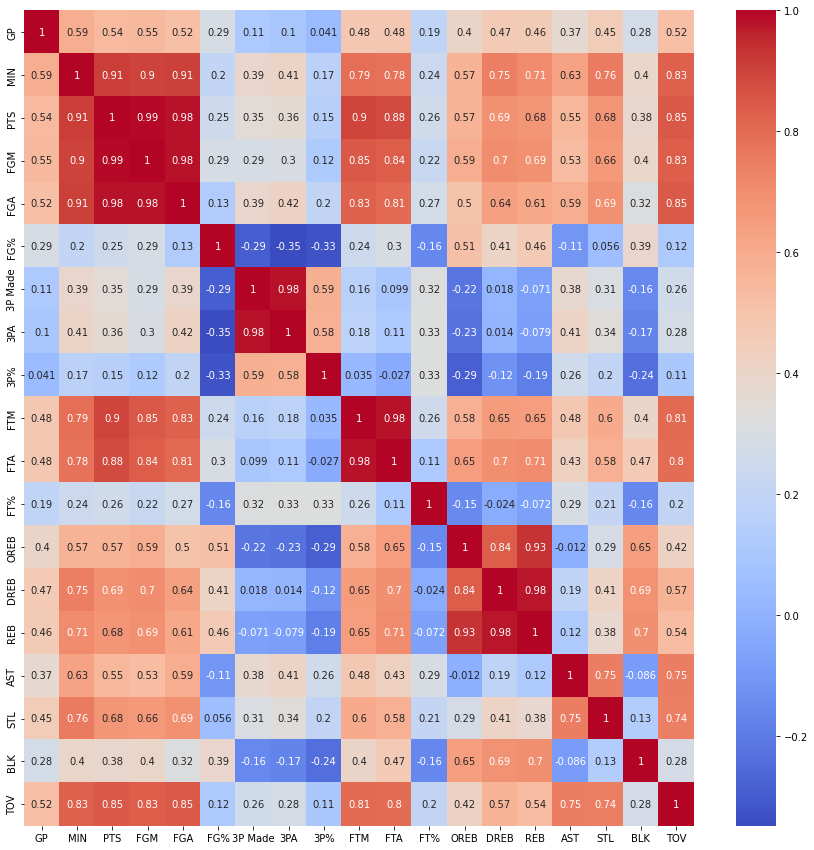

In [20]:
# visualizing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

This dataset has many variables that are correlated with at least one other variable.

In [21]:
df.head()

GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   0.7   
1  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   0.5   
2  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   0.5   
3  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   1.0   
4  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   1.0   

   DREB  REB  AST  STL  BLK  TOV TARGET_5Yrs  
0   3.4  4.1  1.9  0.4  0.4  1.3           0  
1   2.0  2.4  3.7  1.1  0.5  1.6           0  
2   1.7  2.2  1.0  0.5  0.3  1.0           0  
3   0.9  1.9  0.8  0.6  0.1  1.0           1  
4   1.5  2.5  0.3  0.3  0.4  0.8           1

# <font color='#2F4F4F'>4. Data Modeling</font>

In [24]:
# split into features (X) and label (Y)
X = df.iloc[: , : -1].values
y = df.iloc[:, -1].values

In [25]:
# split into 70-30 train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# scaling our features
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()

In [27]:
# importing our class
from sklearn.ensemble import BaggingClassifier           # Bagging Meta-Estimator Classifier
from sklearn.ensemble import RandomForestClassifier      # RandomForest Classifier 
from sklearn.ensemble import AdaBoostClassifier          # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier  # AdaBoost GradientBoostingClassifier
import xgboost as xgb                                    # Importing the XGBoost library


# setting up our classifiers
bagging_meta_classifier = BaggingClassifier()
random_forest_classifier = RandomForestClassifier()
ada_boost_classifier = AdaBoostClassifier()
gbm_classifier = GradientBoostingClassifier() 
xg_boost_classifier = xgb.XGBClassifier() 

# fitting our classifiers to the training data
bagging_meta_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
ada_boost_classifier.fit(X_train, y_train)
gbm_classifier.fit(X_train, y_train)
xg_boost_classifier.fit(X_train, y_train)

# making predictions on the test data
bagging_y_classifier = bagging_meta_classifier.predict(X_test) 
random_forest_y_classifier = random_forest_classifier.predict(X_test) 
ada_boost_y_classifier = ada_boost_classifier.predict(X_test)
gbm_y_classifier = gbm_classifier.predict(X_test)
xg_boost_y_classifier = xg_boost_classifier.predict(X_test)

In [32]:
# assessing the performance of our classifiers via accuracy scores and confusion matrices
from sklearn.metrics import classification_report, accuracy_score 
print("Bagging Classifier", accuracy_score(bagging_y_classifier, y_test))
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, y_test))
print("Ada Boost Classifier", accuracy_score(ada_boost_y_classifier, y_test))
print("GBM Classifier", accuracy_score(gbm_y_classifier, y_test))
print("XGBoost Classifier", accuracy_score(xg_boost_y_classifier, y_test))

Bagging Classifier 0.6741854636591479
Random Forest Classifier 0.7092731829573935
Ada Boost Classifier 0.7017543859649122
GBM Classifier 0.7293233082706767
XGBoost Classifier 0.7142857142857143


Report your findings.
The Gradient Boost Classifier gives us the best accuracy score of 73%

In [33]:
# populate the confusion matrix for the models
from sklearn.metrics import confusion_matrix

print('Bagging Meta Classifier:')
print(confusion_matrix(y_test, bagging_y_classifier)) 

print('Random Forest Classifier:')
print(confusion_matrix(y_test, random_forest_y_classifier)) 

print('Ada Boost Classifier:')
print(confusion_matrix(y_test, ada_boost_y_classifier)) 

print('GBM Classifier:')
print(confusion_matrix(y_test, gbm_y_classifier)) 

print('XGBoost Classifier:')
print(confusion_matrix(y_test, xg_boost_y_classifier)) 


Bagging Meta Classifier:
[[ 90  64]
 [ 66 179]]
Random Forest Classifier:
[[ 81  73]
 [ 43 202]]
Ada Boost Classifier:
[[ 71  83]
 [ 36 209]]
GBM Classifier:
[[ 83  71]
 [ 37 208]]
XGBoost Classifier:
[[ 78  76]
 [ 38 207]]


Gradient Boost Classifier still gives the best combination of True Positives and True Negatives and as seen below, it has better precision, recall and F1 scores

In [34]:
# Populate the classification report to view the precision, recall  and F1 scores
print('Bagging Meta Classifier:')
print(classification_report(y_test, bagging_y_classifier)) 

print('Random Forest Classifier:')
print(classification_report(y_test, random_forest_y_classifier)) 

print('Ada Boost Classifier:')
print(classification_report(y_test, ada_boost_y_classifier)) 

print('GBM Classifier:')
print(classification_report(y_test, gbm_y_classifier)) 

print('XGBoost Classifier:')
print(classification_report(y_test, xg_boost_y_classifier)) 

Bagging Meta Classifier:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       154
           1       0.74      0.73      0.73       245

    accuracy                           0.67       399
   macro avg       0.66      0.66      0.66       399
weighted avg       0.67      0.67      0.67       399

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       154
           1       0.73      0.82      0.78       245

    accuracy                           0.71       399
   macro avg       0.69      0.68      0.68       399
weighted avg       0.70      0.71      0.70       399

Ada Boost Classifier:
              precision    recall  f1-score   support

           0       0.66      0.46      0.54       154
           1       0.72      0.85      0.78       245

    accuracy                           0.70       399
   macro avg       0.69      0.66      0.66       399
w

In [ ]:
# performing dimensionality reduction with autoencoders



# <font color='#2F4F4F'>5. Summary of Findings</font>

of the five ensemble models, GBM Classifier was the most accurate classifier. It also had better precision, Recall and F1 score values

# <font color='#2F4F4F'>6. Recommendations</font>

While it seems like recruiting players who have potential to have their careers last more than 5 years is the quickest and easiest solution to implement, management should consider the benefits of adding players with career lengths less than 5 years. The benefits of doing such include:
* they tend to attempt and make more 3-points than those whose career lengths exceed 5 years
* they play more games than those whose career lengths exceed 5 years.
These two strengths of those whose careers are less than 5 years old means that there are high chances of them scoring more points given proper training.

To conclude, I recommend that management goes after the following players, regardless of their career length:
- those who have played at least 30 games 
- those who play at least 15 minutes 
- those who score at least 5 points per game
- those who make at least 1 field goal
- those who attempt at least 3 field goals
- those who can make and attempt at least 1 3-point
- those who can make and attempt at least 1 free throw

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
Yes.

### b) Did we have the right data?
Yes.

### c) What can be done to improve the solution?
- meet the assumptions of the algorithms (e.g., no multicollinearity, normality, etc. for logistic regression)
- carry out hyperparameter tuning